In [39]:
#🌾 Módulo 3 – Análise de Produção Agrícola + Clima
#🏢 Cenário Simulado:
#Instituto AgriData solicita uma análise para entender como variáveis ambientais impactam a produtividade agrícola, com base em registros mensais de diferentes fazendas.

#📦 Dataset conterá:
#Região

#Tipo de cultura (soja, milho, trigo...)

#Mês

#Chuva (mm)

#Temperatura média (°C)

#Fertilizante aplicado (kg/ha)

#Produção final (ton/ha)

#🎯 Solicitações da empresa:
#Verificar a correlação entre clima/fertilizante e produtividade

#Comparar culturas por rendimento médio

#Analisar variações por região

#Detectar outliers ou padrões climáticos extremos

#Gerar gráficos de apoio para cada tipo de variável

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:/Projetos/projetos-em-ia-e-analise/dados/dados_producao_agricola.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   regiao              300 non-null    object 
 1   cultura             300 non-null    object 
 2   mes                 300 non-null    int64  
 3   chuva_mm            290 non-null    float64
 4   temperatura_media   290 non-null    float64
 5   fertilizante_kg_ha  290 non-null    float64
 6   producao_ton_ha     300 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 16.5+ KB


In [41]:
df.describe() #Colunas de tipos numéricos

,mes,chuva_mm,temperatura_media,fertilizante_kg_ha,producao_ton_ha
count,300.000000,290.000000,290.000000,290.000000,300.000000
mean,6.170000,120.967592,25.698870,180.645343,3.508947
std,3.529299,31.662959,2.942091,40.521111,0.607466
min,1.000000,36.793114,17.721208,73.792958,1.845973
25%,3.000000,100.478126,23.803405,153.558718,3.153371
50%,6.000000,122.606585,25.674977,178.974734,3.506140
75%,9.000000,140.417831,27.619950,210.999457,3.882671
max,12.000000,208.132585,37.558194,291.351097,5.620813


In [42]:
df.head() #Colunas com primeiros dados

,regiao,cultura,mes,chuva_mm,temperatura_media,fertilizante_kg_ha,producao_ton_ha
0,Norte,Milho,7,175.398795,26.666848,186.419048,3.503372
1,Norte,Milho,11,129.862533,23.677871,165.608874,3.434312
2,Sul,Soja,3,82.865535,27.338868,225.449693,4.273834
3,Nordeste,Milho,5,116.914675,25.919617,206.738725,3.493576
4,Nordeste,Soja,4,182.738547,25.329602,166.027328,3.294693


In [43]:
df.isnull().sum()

regiao                 0
cultura                0
mes                    0
chuva_mm              10
temperatura_media     10
fertilizante_kg_ha    10
producao_ton_ha        0
dtype: int64

In [44]:
df = df.dropna(subset=["chuva_mm", "temperatura_media", "fertilizante_kg_ha"])

In [45]:
df.groupby("cultura")[["chuva_mm", "temperatura_media", "fertilizante_kg_ha", "producao_ton_ha"]].corr()

chuva_mm  temperatura_media  fertilizante_kg_ha  \
cultura                                                                       
Milho   chuva_mm            1.000000          -0.042365            0.018282   
        temperatura_media  -0.042365           1.000000            0.053408   
        fertilizante_kg_ha  0.018282           0.053408            1.000000   
        producao_ton_ha    -0.079711           0.530311            0.313767   
Soja    chuva_mm            1.000000          -0.026211            0.108356   
        temperatura_media  -0.026211           1.000000           -0.050119   
        fertilizante_kg_ha  0.108356          -0.050119            1.000000   
        producao_ton_ha     0.051485           0.457934            0.347508   
Trigo   chuva_mm            1.000000           0.045114           -0.142241   
        temperatura_media   0.045114           1.000000            0.032948   
        fertilizante_kg_ha -0.142241           0.032948            1.000000   
        producao_ton_ha     0.033099           0.511030            0.409805   

                            producao_ton_ha  
cultura                                      
Milho   chuva_mm                  -0.079711  
        temperatura_media          0.530311  
        fertilizante_kg_ha         0.313767  
        producao_ton_ha            1.000000  
Soja    chuva_mm                   0.051485  
        temperatura_media          0.457934  
        fertilizante_kg_ha         0.347508  
        producao_ton_ha            1.000000  
Trigo   chuva_mm                   0.033099  
        temperatura_media          0.511030  
        fertilizante_kg_ha         0.409805  
        producao_ton_ha            1.000000

In [46]:
df_tipos = df.groupby(["cultura", "mes", "regiao"])[["producao_ton_ha"]].agg(["mean"])
display(df_tipos)

producao_ton_ha
                                    mean
cultura mes regiao                      
Milho   1   Centro-Oeste        3.194206
            Norte               3.734478
            Sudeste             3.215941
            Sul                 3.299214
        2   Centro-Oeste        3.622752
...                                  ...
Trigo   11  Sul                 3.560496
        12  Nordeste            3.695690
            Norte               3.898195
            Sudeste             3.872965
            Sul                 3.529257

[139 rows x 1 columns]

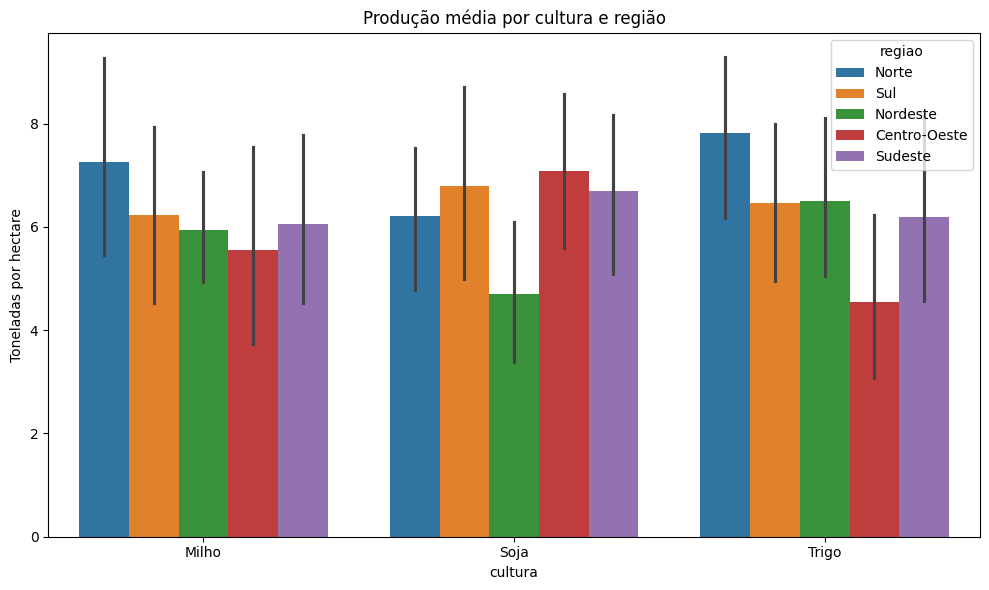

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="cultura", y="mes", hue="regiao")
plt.title("Produção média por cultura e região")
plt.ylabel("Toneladas por hectare")
plt.tight_layout()
plt.show()